# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


#### Observations
1. There appears to be little to no correlation between latitude and cloudiness. Distance to the equator has a minimal influence on cloudiness as you get closer.
2. There appears to be a fairly strong correlation between latitude and max temperature. As you approach the equator, max temperature increases. As you go further away from the equator, max temperature decreases. This remains constant across hemispheres.
3. There appears to be only a moderate correlation between latitude and humidity. As you approach the equator, humidity levels seem to increase but there is not a strong correlation when you analyze along hemispheres.


In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("Beginning data retrieval:")
print("-----------------------------")
cityrecord = 0
cityset = 1

databasecities = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        if cityrecord == 50:
            cityrecord = 1
            cityset += 1
        else:
            cityrecord += 1
        
        print(f'Processing Record {cityrecord} of Set {cityset} | {city}')
        
        databasecities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data retrieval complete")        
print("-----------------------------")

Beginning data retrieval:
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | kontagora
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | labuhan
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | karratha
Processing Record 15 of Set 1 | eskasem
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | cedar city
Processing Record 20 of Set 1 | gardan diwal
City not found. Skipping...
Processing Record 21 of Set 1 | butaritari
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weatherdata = pd.DataFrame({"City": databasecities,
                            "Lat": lat,
                            "Lng": lng,
                            "Max Temp": maxtemp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": windspeed,
                            "Country": country,
                            "Date": date})

#weatherdata.to_csv("Weather Data.csv")
weatherdata.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [24]:
weatherdata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.87,-73.82,37.99,73,20,4.68,CL,1595823390
1,New Norfolk,-42.78,147.06,55.99,72,100,1.99,AU,1595823507
2,Kontagora,10.40,5.47,71.47,96,92,6.42,NG,1595823507
3,Bluff,-46.60,168.33,50.86,71,0,4.50,NZ,1595823224
4,Avarua,-21.21,-159.78,69.80,94,66,4.70,CK,1595823292


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
weatherdata.loc[weatherdata["Humidity"] > 100, :]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

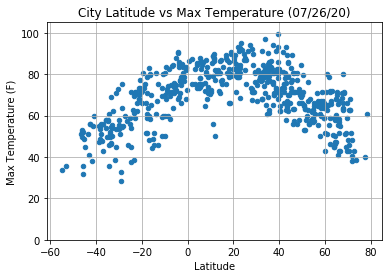

In [97]:
weatherdata.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "City Latitude vs Max Temperature (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("City Latitude vs Max Temperature (07-26-20).png")
plt.show()


## Latitude vs. Humidity Plot

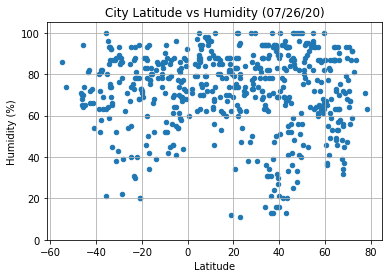

In [98]:
weatherdata.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "City Latitude vs Humidity (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("City Latitude vs Humidity (07-26-20).png")
plt.show()


## Latitude vs. Cloudiness Plot

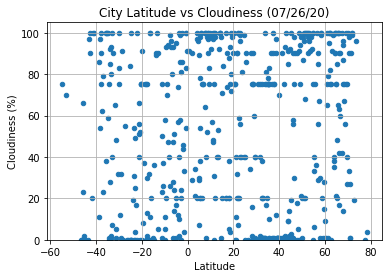

In [99]:
weatherdata.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "City Latitude vs Cloudiness (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City Latitude vs Cloudiness (07-26-20).png")
plt.show()


## Latitude vs. Wind Speed Plot

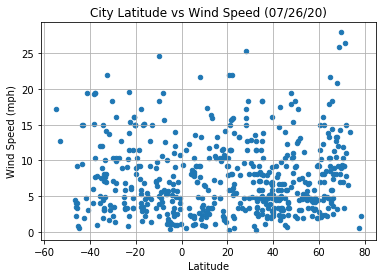

In [100]:
weatherdata.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "City Latitude vs Wind Speed (07/26/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("City Latitude vs Wind Speed (07-26-20).png")
plt.show()


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [77]:
# Create Northern and Southern Hemisphere DataFrames
northHemi = weatherdata.loc[weatherdata["Lat"] > 0, :]
southHemi = weatherdata.loc[weatherdata["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.42719463168735844


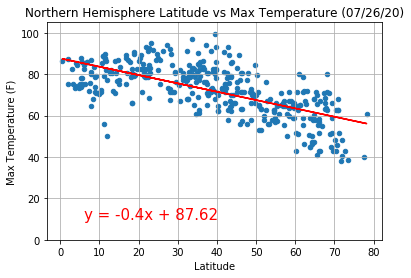

In [83]:
northHemi.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "Northern Hemisphere Latitude vs Max Temperature (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northHemi["Lat"], northHemi["Max Temp"])
regress_values = northHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(northHemi["Lat"],northHemi["Max Temp"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Northern Hemisphere Latitude vs Max Temperature (07-26-20).png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5229372053850656


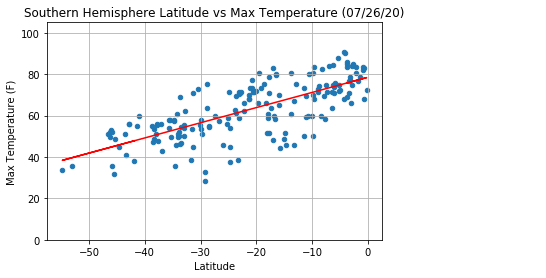

In [84]:
southHemi.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "Southern Hemisphere Latitude vs Max Temperature (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southHemi["Lat"], southHemi["Max Temp"])
regress_values = southHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(southHemi["Lat"],southHemi["Max Temp"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Southern Hemisphere Latitude vs Max Temperature (07-26-20).png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.022670057441383926


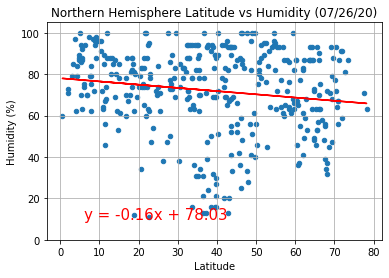

In [85]:
northHemi.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "Northern Hemisphere Latitude vs Humidity (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northHemi["Lat"], northHemi["Humidity"])
regress_values = northHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(northHemi["Lat"],northHemi["Humidity"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Northern Hemisphere Latitude vs Humidity (07-26-20).png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0007029533786439355


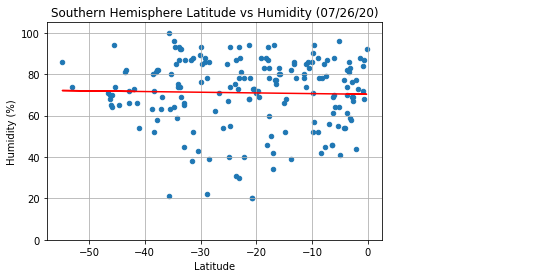

In [86]:
southHemi.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "Southern Hemisphere Latitude vs Humidity (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southHemi["Lat"], southHemi["Humidity"])
regress_values = southHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(southHemi["Lat"],southHemi["Humidity"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Southern Hemisphere Latitude vs Humidity (07-26-20).png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0003063650841142006


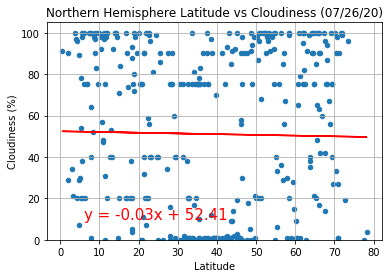

In [87]:
northHemi.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "Northern Hemisphere Latitude vs Cloudiness (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northHemi["Lat"], northHemi["Cloudiness"])
regress_values = northHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(northHemi["Lat"],northHemi["Cloudiness"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Northern Hemisphere Latitude vs Cloudiness (07-26-20).png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0005528127803768753


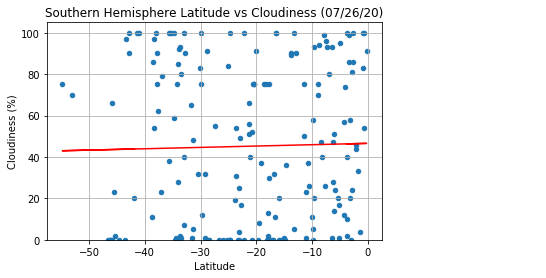

In [89]:
southHemi.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "Southern Hemisphere Latitude vs Cloudiness (07/26/20)", grid = True, ylim=[0, 105])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southHemi["Lat"], southHemi["Cloudiness"])
regress_values = southHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(southHemi["Lat"],southHemi["Cloudiness"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Southern Hemisphere Latitude vs Cloudiness (07-26-20).png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.00953300963144754


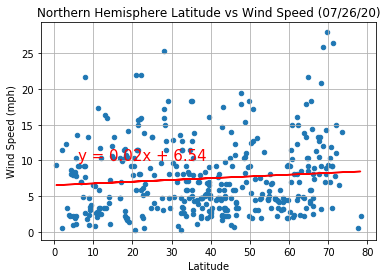

In [93]:
northHemi.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "Northern Hemisphere Latitude vs Wind Speed (07/26/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northHemi["Lat"], northHemi["Wind Speed"])
regress_values = northHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(northHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(northHemi["Lat"],northHemi["Wind Speed"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Northern Hemisphere Latitude vs Wind Speed (07-26-20).png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02526584241292706


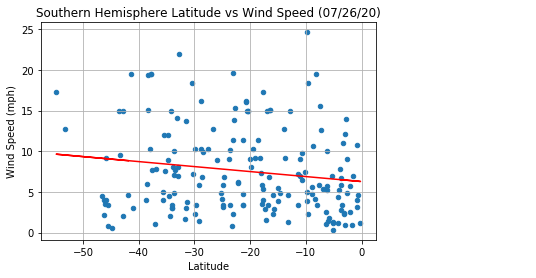

In [94]:
southHemi.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "Southern Hemisphere Latitude vs Wind Speed (07/26/20)", grid = True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southHemi["Lat"], southHemi["Wind Speed"])
regress_values = southHemi["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(southHemi["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
correlation = sts.pearsonr(southHemi["Lat"],southHemi["Wind Speed"])

print(f"The r-squared is {correlation[0]**2}")
plt.savefig("Southern Hemisphere Latitude vs Wind Speed (07-26-20).png")
plt.show()
